In [1]:
import sys
sys.path.insert(0,'C:\\code\\python_for_the_financial_economist\\')

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from scipy import stats

"""
Own packages
"""

from codelib.visualization.layout import DefaultStyle
DefaultStyle();

# Revisiting risk measures

In this week, we have talked about random variables and distributions, so we are ready to talk more about risk measures. A risk measure helps us to quantify the dissatisfaction with a given portfolio or investment strategy and is simply a function that maps the random portfolio to the real numbers. The function $\varrho$, as previously discussed, has to satisfy certain properties. 

* Normalization 
* Monotonicity
* Translation invariance

and we will also like it to satisfy

* Sub-additivity
* Homogeneity


## Goal of the investor 

We will generally assume that an investor holds a portfolio of assets with portfolio weights $\mathbf{w}$ ($n \times 1$ vector) such that the value at time $t$ is given by

$$
\mathbf{V}_t = \mathbf{w}^\top \mathbf{P}_t
$$

The investor may care about (we will use $\mathbf{V}_{t + \tau}$ to denote one of these objectives):

__Total value (absolute wealth)__ at the end of the investment horizon 

$$
\mathbf{V}_{t + \tau} = \mathbf{w}^\top \mathbf{P}_{t + \tau}
$$

__Value relative to some benchmark__ at the end of the investment horizon 

$$
\mathbf{V}_{t + \tau} = \mathbf{w}^\top \mathbf{P}_{t + \tau} - \nu(\mathbf{w}, \mathbf{w}_b)\mathbf{w}_b^\top \mathbf{P}_{t + \tau} 
$$

where 

$$
\nu(\mathbf{w}, \mathbf{w}_b) = \frac{\mathbf{w}^\top \mathbf{P}_{t}}{\mathbf{w}_b^\top \mathbf{P}_{t}}
$$

ensures that portfolios has the same value at time $t$. 

__Net profits__ at the end of the investment horizon 

$$
\mathbf{V}_{t + \tau} = \mathbf{w}^\top \left(\mathbf{P}_{t + \tau} - \mathbf{P}_t \right)
$$

__Relative net profits__ at the end of the investment horizon 

$$
\mathbf{V}_{t + \tau} = \mathbf{w}^\top \frac{\mathbf{P}_{t + \tau} - \mathbf{P}_t}{\mathbf{P}_t} = \mathbf{w}^\top \left( \frac{\mathbf{P}_{t + \tau}}{\mathbf{P}_t} - 1\right)
$$

We note that all "objectives" are affine transformations of $\mathbf{P}_{t+\tau}$. This will make it easy to derive the distribution of $\mathbf{P}_{t + \tau}$ if it is e.g. multivariate normal, but it will generally be a hard task!

## Value-at-Risk 

Typically, an investor worries about the potential loss over a given horizon, say $\tau$. We can define a measure of dissatisfaction based on the quantiles of the loss distribution (think of a loss a negative net profit). Therefore, we define the $\text{VaR}_\alpha(\mathbf{V}_{t + \tau})$ for $\alpha \in [0, 1]$ as the smallest number such that the probability of $-\mathbf{V}_{t + \tau}$ not exceeding this number is at least $1-\alpha$. 

Therefore, $\text{VaR}_\alpha(\mathbf{V}_{t + \tau})$ is equal to the $\alpha$ quantile of $\mathbf{V}_{t + \tau}$ (multiplied with -1) or the $1-\alpha$ quantile of $-\mathbf{V}_{t + \tau}$: 

$$
\text{VaR}_\alpha(\mathbf{V}_{t + \tau}) = -Q_{\mathbf{V}_{t + \tau}}(\alpha)
$$

If we assume that the linear return of an asset is distributed (1 year horizon) as $\mathbf{V}_{t + 1} = \frac{P_{t+1}}{P_t} - 1   \sim  N(0, 0.2)$, then we can use the quantile function of a normal distribution 

$$
Q_{\mathbf{V}_{t + \tau}}(\alpha) = \mu +\sigma {\sqrt {2}}\text {erf} ^{-1}(2 \alpha-1)
$$

Below we use `scipy.stats.norm` to calculate the 5\% VaR and illustrate it. 

Please note that the normal assumption is probably bad for the linear return over longer periods, but it is very often used by practicioners. 

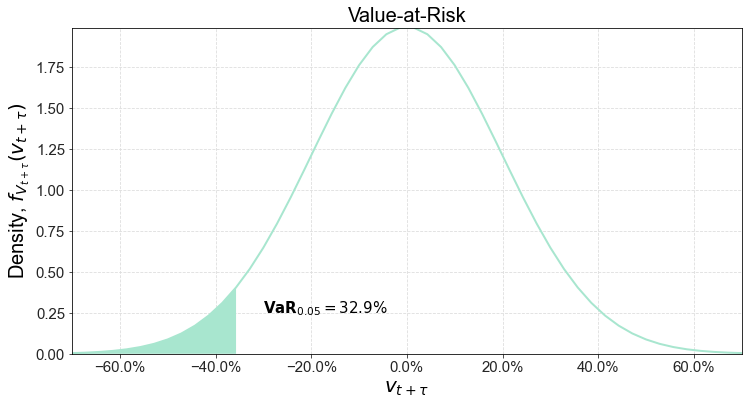

In [94]:
mu = 0.0
sigma = 0.2

# calculate 5% VaR
value_at_risk = stats.norm.ppf(0.05, loc=mu, scale=sigma)

# values for plotting the pdf
v_values = np.linspace(-0.7, 0.7)
pdf_values = stats.norm.pdf(v_values, loc=mu, scale=sigma)

"""
Plotting 
"""

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(v_values, pdf_values)
ax.fill_between(v_values, pdf_values, where=v_values<value_at_risk)
ax.set_title("Value-at-Risk", size=20)
ax.set_xlabel('$v_{t + \\tau}$', size=20)
ax.set_ylabel('Density, $f_{V_{t + \\tau}}(v_{t + \\tau})$', size=20);

# add text
text_to_add =  "$\mathbf{VaR}_{0.05}" + " = {:,.1f}\%$".format(-value_at_risk*100)
ax.text(-0.3, 0.25, text_to_add);

# x-axis a percent
xticks = mtick.PercentFormatter(xmax=1.0, decimals=1)
ax.xaxis.set_major_formatter(xticks)

If we consider a portfolio of assets

$$
\mathbf{P}_{t + \tau} \sim N(\boldsymbol{\mu}, \boldsymbol{\Sigma})
$$

Then the net profits of a portfolio $\mathbf{V}_{t + \tau} = \mathbf{w}^\top \left(\mathbf{P}_{t + \tau} - \mathbf{P}_t \right)$ will be distributed as (note that $\mathbf{P}_t$ is known at time $t$)

$$
\mathbf{V}_{t + \tau} \sim N\left(\mathbf{w}^\top\left(\boldsymbol{\mu} -\mathbf{P}_t \right), \mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w} \right)
$$

Thus, we could easily use a univariate normal distribution to calculate the $\text{VaR}$. But this is not generally the case! E.g. if we assume (which often is a better approximation)

$$
\mathbf{P}_{t + \tau} \sim \log N(\boldsymbol{\mu}, \boldsymbol{\Sigma})
$$

Then, we do not have an easy closed-form expression for distribution of $\mathbf{V}_{t + \tau}$. Therefore, we often must resort to simulations or approximations to calculate the value at risk for at portfolio. 

### Cornish-Fisher approximation 

__Note:__ I do not expect you to know all the details, but simply that you can apply the approximation. 

One often used approximation is the Cornish-Fisher approximation (based on a Cornish-Fisher expansion). [Cornish and Fisher (1937)](https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15229/1/148.pdf)  used an asymptotic expansion to approximate the quantiles of a probability distribution based on its [cumulants](https://en.wikipedia.org/wiki/Cumulant).

We note that the $n$'th cumulant of a random variable $X$ can be found using the cumulant genrating function 

$$
 K(t)=\log \text {E} \left[e^{tX}\right] = \sum _{n=1}^{\infty }\kappa _{n}{\frac {t^{n}}{n!}}=\mu t+\sigma ^{2}{\frac {t^{2}}{2}}+\cdots 
$$

by differentiating $n$ times and evaluating at $t=0$. If we denote the mean by $\mu$ and the central moments by $\mu_k = \text{E}[(X-\mu)^k]$ one can show that the first four cumulants are 

$$
\begin{align}
\kappa_1 &= \mu \\
\kappa_2 &= \mu_2 = \sigma^2 \\
\kappa_3 &= \frac{\mu_3}{\kappa_2^{3/2}} = \frac{\mu_3}{\sigma^3} = \text{Skew}(X) \\
\kappa_4 &= \frac{\mu_4}{\kappa_2^{2}}  - 3= \frac{\mu_4}{\sigma^4} = \text{Kurt}(X)
\end{align}
$$

The Cornish-Fisher approximation using the first four cumulants of a random variable $X$ with mean $\mu$ and variance $\sigma^2$ is given by ([see](https://en.wikipedia.org/wiki/Cornish%E2%80%93Fisher_expansion))

$$
Q_X(p) = \mu + \sigma \left[z_p +  \text{Skew}(X) \frac{He_2(z_p)}{6} +  \text{Kurt}(X) \frac{He_3(z_p)}{24} - \text{Skew}(X)^2 \frac{2He_3(z_p) + He_1(z_p)}{36}  \right]
$$

where $He_n$ is the n'th order ["probabilist's" Hermite polynomial](https://en.wikipedia.org/wiki/Hermite_polynomials) and $z_p$ is the $p$ percentile of the standard normal distribution. 

__Example: Approximation to log-normal__

Assume that $X \sim \log N(0, 0.2)$. Calculate the $5\%$ percentile of $X$. Define a funtion that calculates the Cornish-Fisher approximation. Use this to calculate the $5\%$ percentile of $X$. 

In [69]:
mu = 0.0
sigma = 0.2

stats.lognorm.ppf(0.05, s = sigma, scale = np.exp(mu))

0.719664084323889

In [70]:
def calculate_cornish_fisher_percentile(alpha, mu, sigma, skew, kurt):

    """
    Calculates the percentile, alpha, based on the Cornish-Fisher approximation 

    Parameters
    ----------
    alpha: float
    mu: float
    sigma: float
    skew: float
    kurt: float

    Returns
    -------
    float
        Percentile

    """

    z = stats.norm.ppf(alpha)
    he2 = np.polynomial.hermite_e.hermeval(z, [0.0, 0.0, 1.0])
    he3 = np.polynomial.hermite_e.hermeval(z, [0.0, 0.0, 0.0, 1.0])
    he13 = np.polynomial.hermite_e.hermeval(z, [0.0, -1.0, 0.0, -2.0])
    
    w = (z +
        he2*skew/6 +
        he3*kurt/24 +
        he13*(skew**2)/36)
    
    return mu + sigma * w

In [73]:
mu_new, var, skew, kurt = stats.lognorm.stats(s = sigma, scale = np.exp(mu),  moments='mvsk')

calculate_cornish_fisher_percentile(0.05, mu_new, np.sqrt(var), skew, kurt)

0.7214712371864381

### Simulation 

Another often used approach is to calculate $\text{VaR}$ using simulations. Let us revist a simple example where we assume that log returns (the market invariants) follow a multivariate normal distribution 

$$
\mathbf{r}_{t+ \tau, t} = \log \frac{\mathbf{P}_{t+\tau}}{\mathbf{P}_t} \sim N(\boldsymbol{\mu}, \boldsymbol{\Sigma})
$$

We also remember that we can write 

$$
\mathbf{R}_{t + \tau, t} = e^{\mathbf{r}_{t+ \tau, t}} - 1
$$

The investor is interested in the $\text{VaR}$ of $\mathbf{V}_{t + \tau} = \mathbf{w}^\top\mathbf{R}_{t + \tau, t}$. By simulating enough times, we can "estimate" the  $\text{VaR}$. 

__Example: Calculating VaR using simulations__

Consider a two asset example with stocks (S) and bonds (B) and assume that log returns are bivariate normally distributed. Stocks are defined by $\mu_S = 0.04, \sigma_S = 0.15$ and bonds are defined by $\mu_B = 0.01, \sigma_B = 0.06$. The correlation between stocks and bonds is $\rho _{S,B} = 0.2$.

Calculate the 5\% $\text{VaR}$ of an equally weighted porfolio (of linear returns). 

In [95]:
"""
Define relevant information 
"""

w_eq = np.array([0.5, 0.5])

mu_s = 0.06
mu_b = 0.01
sigma_s = 0.15
sigma_b = 0.075
rho = 0.2

mus = np.array([mu_s, mu_b])
vols = np.array([sigma_s, sigma_b])
corr_mat = np.array([[1.0, rho], [rho, 1.0]])
cov_mat = np.outer(vols, vols) * corr_mat

"""
Simulate 
"""
num_sim = 99999
sim_log_returns = np.random.multivariate_normal(mus, cov_mat, size=num_sim)
sim_lin_returns = np.exp(sim_log_returns) - 1.0
sim_port_returns = sim_lin_returns @ w_eq

# use numpys percentile to calculate the fifth percentile (note the use of 5 and not 0.05)
value_at_risk = np.percentile(sim_port_returns, q=5)

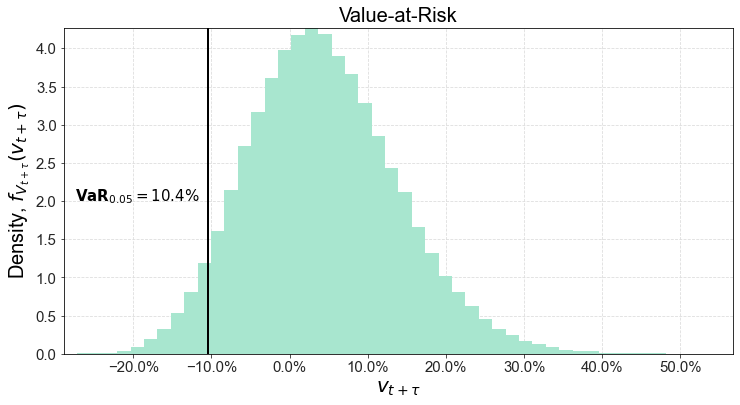

In [98]:
"""
Plotting
"""

fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(sim_port_returns, density=True, bins=50)
ax.axvline(value_at_risk, ymin=0, ymax=4.1, color="black")
ax.set_title("Value-at-Risk", size=20)
ax.set_xlabel('$v_{t + \\tau}$', size=20)
ax.set_ylabel('Density, $f_{V_{t + \\tau}}(v_{t + \\tau})$', size=20);

# add text
text_to_add =  "$\mathbf{VaR}_{0.05}" + " = {:,.1f}\%$".format(-value_at_risk*100)
ax.text(-0.275, 2.0, text_to_add);

# x-axis a percent
xticks = mtick.PercentFormatter(xmax=1.0, decimals=1)
ax.xaxis.set_major_formatter(xticks)

## Conditional Value-at-Risk  (Expected shortfall)

We have previously noted that $\text{VaR}$ is not a coherent risk measure since it does not satisfy the requirement of sub-additivity:

$$
\mathrm{If}\; Z_1, Z_2 \in \mathcal{L} ,\; \mathrm{then}\; \text{VaR}(Z_1 + Z_2) \nleq \text{VaR}(Z_1) + \text{VaR}(Z_2)
$$

This means that $\text{VaR}$ (sometimes) will not promote diversification - this is quit problematic when diversification is key in asset allocation! 

The Conditional Value-at-Risk (or Expected shortfall), $\text{CVaR}$,  is a coherent risk measure that is sub-additive. The $\text{CVaR}$ is defined as the average $\text{VaR}$

$$
\text{CVaR}_{\alpha}(X) = \frac{1}{\alpha} \intop_{0}^{\alpha} \text{VaR}_{s} (X) ds 
$$

If we assume that the linear return of an asset is distributed (1 year horizon) as $\mathbf{V}_{t + 1} = \frac{P_{t+1}}{P_t} - 1   \sim  N(0, 0.2)$, then we can use the quantile function of a normal distribution 

$$
\text{CVaR}_{\alpha} = -\mu + \sigma \frac{\phi\left(\Phi^{-1}(\alpha) \right)}{\alpha}
$$

where $\phi()$ and $\Phi^{-1}$ denote the standard normal pdf and quantile function respectively. 

Below we use `scipy.stats.norm` to calculate the 5\% CVaR and illustrate it. 

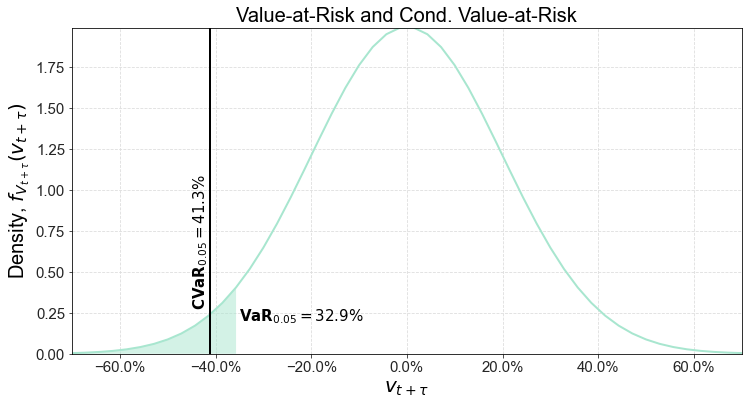

In [115]:
mu = 0.0
sigma = 0.2

# calculate 5% VaR and CVaR
value_at_risk = stats.norm.ppf(0.05, loc=mu, scale=sigma)
cond_value_at_risk = mu -  sigma*stats.norm.pdf(stats.norm.ppf(0.05)) / 0.05

# values for plotting the pdf
v_values = np.linspace(-0.7, 0.7)
pdf_values = stats.norm.pdf(v_values, loc=mu, scale=sigma)

"""
Plotting 
"""

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(v_values, pdf_values)
ax.fill_between(v_values, pdf_values, where=v_values<value_at_risk, alpha=0.5)
ax.axvline(cond_value_at_risk, ymin=0, ymax=4.1, color="black")
ax.set_title("Value-at-Risk and Cond. Value-at-Risk", size=20)
ax.set_xlabel('$v_{t + \\tau}$', size=20)
ax.set_ylabel('Density, $f_{V_{t + \\tau}}(v_{t + \\tau})$', size=20);

# add text
text_to_add =  "$\mathbf{VaR}_{0.05}" + " = {:,.1f}\%$".format(-value_at_risk*100)
text_to_add_2 =  "$\mathbf{CVaR}_{0.05}" + " = {:,.1f}\%$".format(-cond_value_at_risk*100)
ax.text(-0.35, 0.20, text_to_add);
ax.text(-0.45, 0.3, text_to_add_2,rotation=90);

# x-axis a percent
xticks = mtick.PercentFormatter(xmax=1.0, decimals=1)
ax.xaxis.set_major_formatter(xticks)

# References

## Articles

[Cornish and Fisher (1937)](https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15229/1/148.pdf)

## Books
